In [1]:
%load_ext autoreload
%autoreload 2

import seaborn as sns

from matplotlib import pyplot as plt

from src.utils import g_bin_constant, g_real_constant, sin_chaotic_term

# Gravitational constant for real variables

In [2]:
max_iter = 50

wMax = 20
wMin = 1e-10

g_real = []
g_normal = []
chaotic_terms = []
x_values = []
for curr_iter in range(1, max_iter+1):
    chValue = wMax - curr_iter * ((wMax - wMin) / max_iter)
    chaotic_term, x_val = sin_chaotic_term(curr_iter, chValue)
    chaotic_terms.append(chaotic_term)
    x_values.append(x_val)
    g_real.append(g_real_constant(curr_iter, max_iter) + chaotic_term)
    g_normal.append(g_real_constant(curr_iter, max_iter))

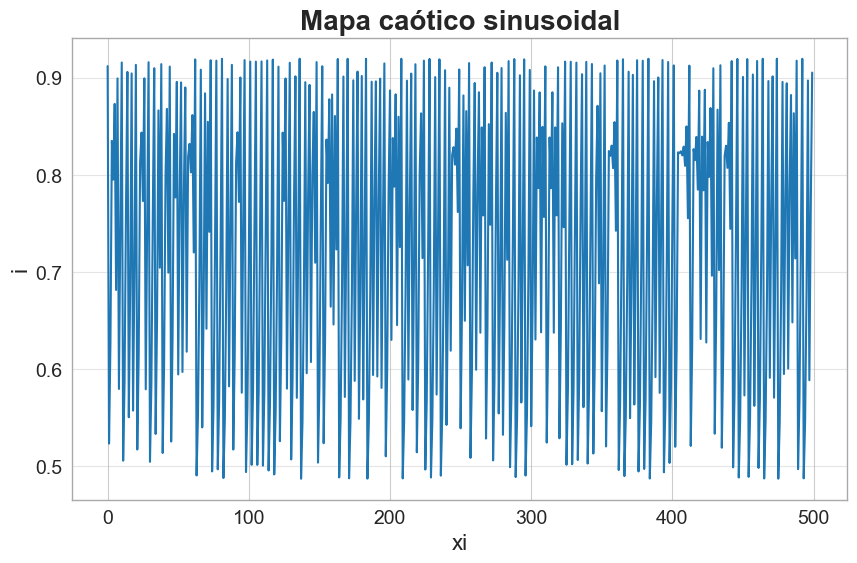

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title("Mapa caótico sinusoidal", fontweight='bold', fontsize=20)
# ax.set_xlim(min(df[x_data]), max(df[x_data]))
# ax.set_ylim(min(df[y_data]), max(df[y_data]))

ax.grid(axis='y', color='#A9A9A9', alpha=0.3, zorder=1)

ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel("xi", fontsize=16)
ax.set_ylabel("i", fontsize=16)

for spn in ('top', 'right', 'bottom', 'left'):
    ax.spines[spn].set_visible(True)
    ax.spines[spn].set_linewidth(1.0)
    ax.spines[spn].set_color('#A9A9A9')

ax.plot(x_values)
plt.show()

fig.savefig("../figures/sinusoidal_chaotic_map.pdf", format='pdf', dpi=300, bbox_inches='tight', transparent=True)

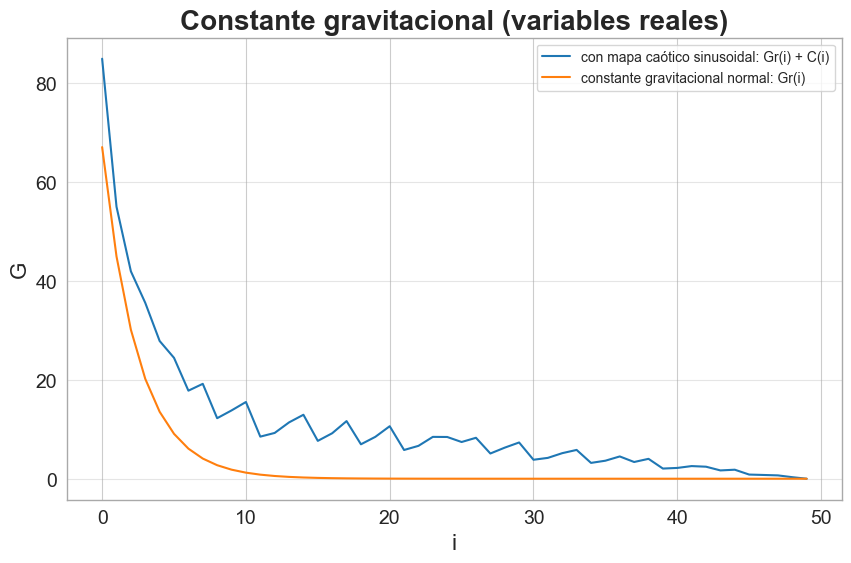

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title("Constante gravitacional (variables reales)", fontweight='bold', fontsize=20)

ax.grid(axis='y', color='#A9A9A9', alpha=0.3, zorder=1)

ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel("i", fontsize=16)
ax.set_ylabel("G", fontsize=16)

for spn in ('top', 'right', 'bottom', 'left'):
    ax.spines[spn].set_visible(True)
    ax.spines[spn].set_linewidth(1.0)
    ax.spines[spn].set_color('#A9A9A9')

ax.plot(g_real, label="con mapa caótico sinusoidal: Gr(i) + C(i)")
ax.plot(g_normal, label="constante gravitacional normal: Gr(i)")

ax.legend()
plt.show()

fig.savefig("../figures/sinusoidal_gconstant.pdf", format='pdf', dpi=300, bbox_inches='tight', transparent=True)


# Gravitational constant for discrete variables

In [15]:
max_iter = 500

wMax = 20
wMin = 1e-10

g_discrete = []
g_discrete_chaotic = []
chaotic_terms = []
x_values = []
for curr_iter in range(1, max_iter+1):
    chValue = wMax - curr_iter * ((wMax - wMin) / max_iter)
    chaotic_term, x_val = sin_chaotic_term(curr_iter, chValue)
    chaotic_terms.append(chaotic_term)
    x_values.append(x_val)
    g_discrete.append(g_bin_constant(curr_iter, max_iter))
    g_discrete_chaotic.append(g_bin_constant(curr_iter, max_iter) + chaotic_term)

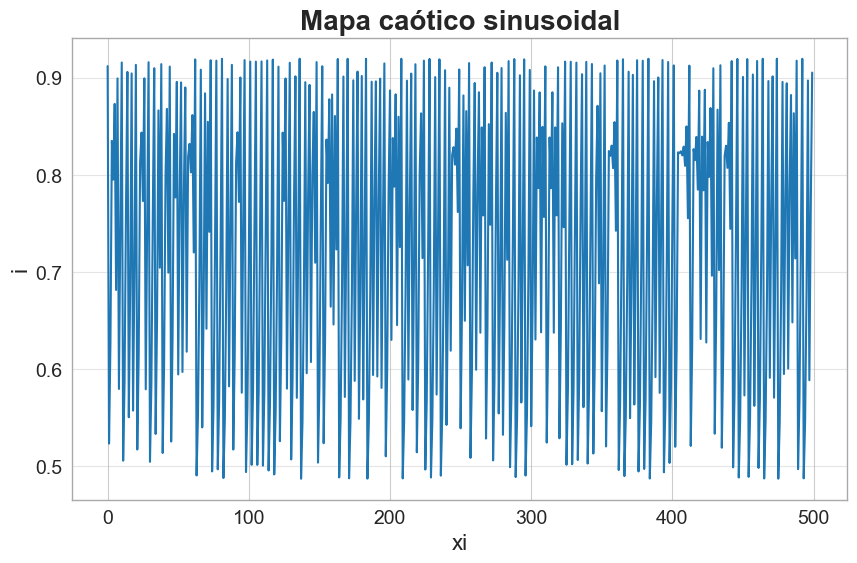

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title("Mapa caótico sinusoidal", fontweight='bold', fontsize=20)

ax.grid(axis='y', color='#A9A9A9', alpha=0.3, zorder=1)

ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel("xi", fontsize=16)
ax.set_ylabel("i", fontsize=16)

for spn in ('top', 'right', 'bottom', 'left'):
    ax.spines[spn].set_visible(True)
    ax.spines[spn].set_linewidth(1.0)
    ax.spines[spn].set_color('#A9A9A9')

ax.plot(x_values, label="mapa caótico sinusoidal (xi)")

#ax.legend()
plt.show()

fig.savefig("../figures/sinusoidal_gconstant.pdf", format='pdf', dpi=300, bbox_inches='tight', transparent=True)

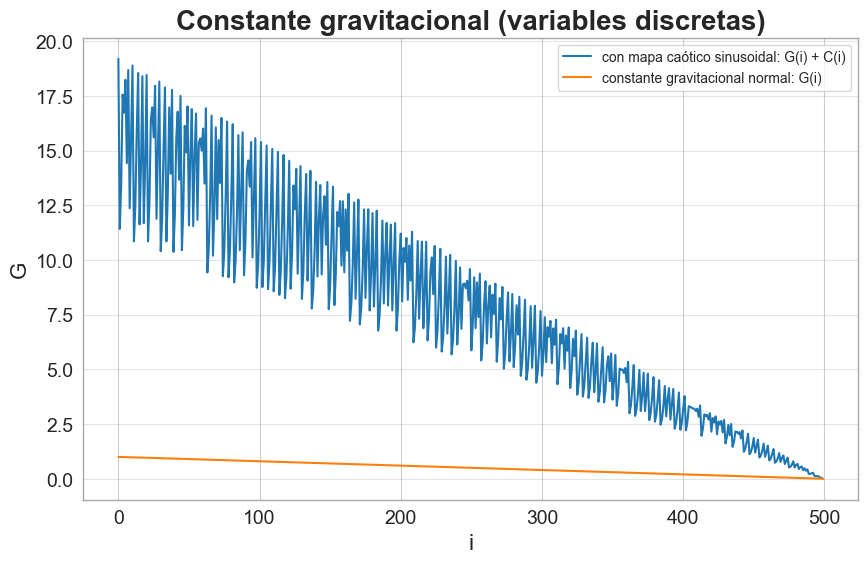

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title("Constante gravitacional (variables discretas)", fontweight='bold', fontsize=20)

ax.grid(axis='y', color='#A9A9A9', alpha=0.3, zorder=1)

ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel("i", fontsize=16)
ax.set_ylabel("G", fontsize=16)

for spn in ('top', 'right', 'bottom', 'left'):
    ax.spines[spn].set_visible(True)
    ax.spines[spn].set_linewidth(1.0)
    ax.spines[spn].set_color('#A9A9A9')

ax.plot(g_discrete_chaotic, label="con mapa caótico sinusoidal: G(i) + C(i)")
ax.plot(g_discrete, label="constante gravitacional normal: G(i)")

ax.legend()
plt.show()

fig.savefig("../figures/sinusoidal_gconstant_discrete.pdf", format='pdf', dpi=300, bbox_inches='tight', transparent=True)

    
ax.plot(g_discrete)

# ax.set_ylabel("G(t) + C(t)")

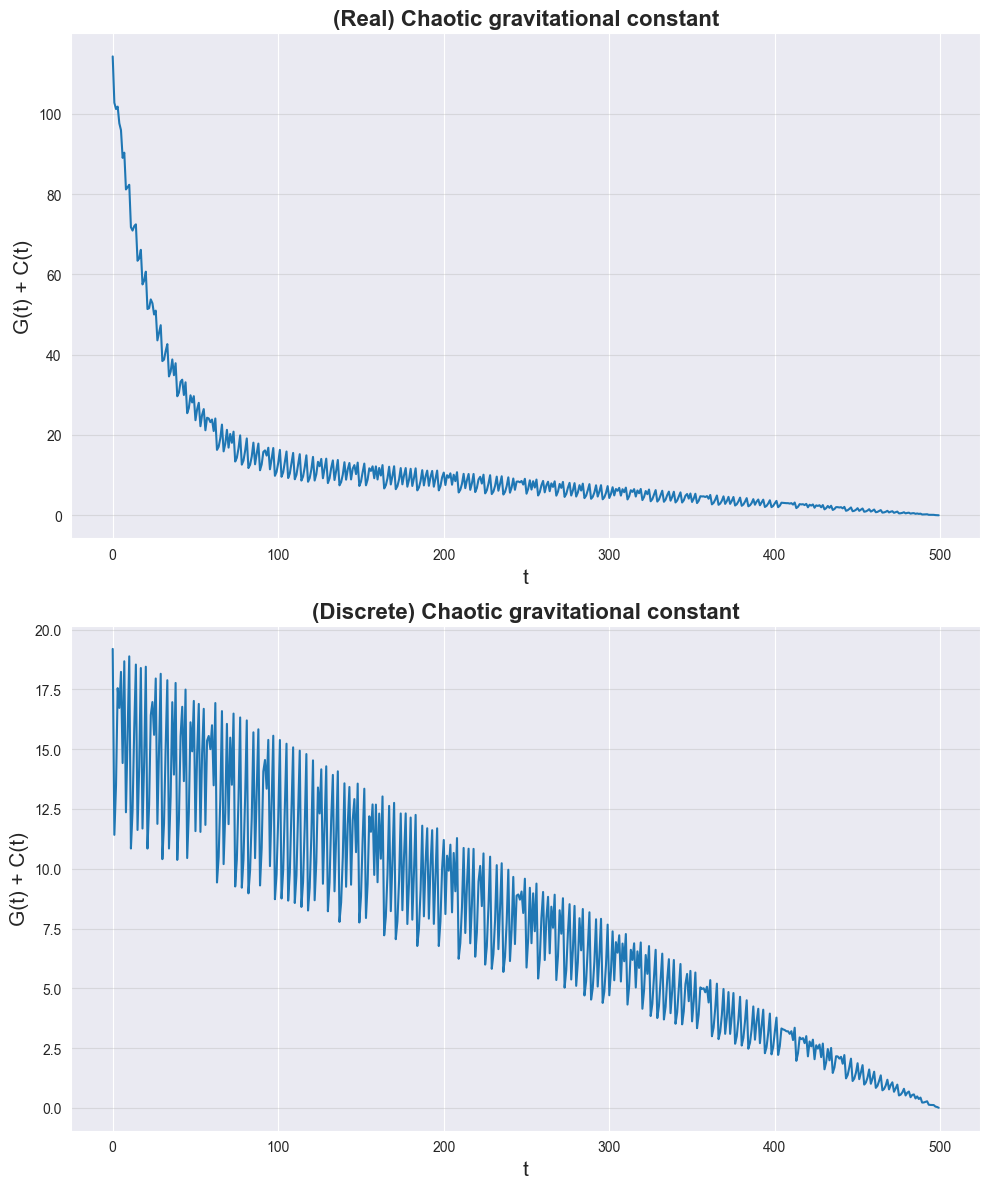

In [40]:
# Two vertical subplots

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Axis 1 - Real chaotic gravitational constant
ax1.set_title("(Real) Chaotic gravitational constant", fontweight='bold', fontsize=16)
    
ax1.plot(g_real)

ax1.grid(axis='y', color='#A9A9A9', alpha=0.3, zorder=1)

ax1.set_xlabel("t", fontsize=15)
ax1.set_ylabel("G(t) + C(t)", fontsize=15)

# Axis 1 - Discrete chaotic gravitational constant
ax2.set_title("(Discrete) Chaotic gravitational constant", fontweight='bold', fontsize=16)
    
ax2.plot(g_discrete)

ax2.grid(axis='y', color='#A9A9A9', alpha=0.3, zorder=1)

ax2.set_xlabel("t", fontsize=15)
ax2.set_ylabel("G(t) + C(t)", fontsize=15)

# Reduce margins of figure when saving
fig.tight_layout()
plt.show()
fig.savefig("../data/images/chaotic_gravitational_constant.png", transparent=True, dpi=300)